In [2]:
import pandas as pd
import numpy as np
import requests
import pandas as pd
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from string import punctuation
from sklearn.feature_extraction.text import CountVectorizer
import re
from nltk.tokenize import word_tokenize

In [4]:
data=pd.read_csv('D:/Customer_service/Case_Study_Customer_Concern_Areas/amazon_reviews.csv')
data.head()

,Unnamed: 0,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,0,0528881469,"[0, 0]",5.0,We got this GPS for my husband who is an (OTR)...,"06 2, 2013",AO94DHGC771SJ,amazdnu,Gotta have GPS!,1.370131e+09
1,1,0528881469,"[12, 15]",1.0,"I'm a professional OTR truck driver, and I bou...","11 25, 2010",AMO214LNFCEI4,Amazon Customer,Very Disappointed,1.290643e+09
2,2,0528881469,"[43, 45]",3.0,"Well, what can I say. I've had this unit in m...","09 9, 2010",A3N7T0DY83Y4IG,C. A. Freeman,1st impression,1.283990e+09
3,3,0528881469,"[9, 10]",2.0,"Not going to write a long review, even thought...","11 24, 2010",A1H8PY3QHMQQA0,"Dave M. Shaw ""mack dave""","Great grafics, POOR GPS",1.290557e+09
4,4,0528881469,"[0, 0]",1.0,I've had mine for a year and here's what we go...,"09 29, 2011",A24EV6RXELQZ63,Wayne Smith,"Major issues, only excuses for support",1.317254e+09


In [5]:
data.isnull().sum()

Unnamed: 0        0
asin              0
helpful           0
overall           0
reviewText        2
reviewTime        0
reviewerID        0
reviewerName      5
summary           0
unixReviewTime    0
dtype: int64

In [6]:
data.dropna(inplace=True)

In [7]:
data['sentiment']=data['overall'].apply(lambda x:1 if x>=3 else 0)
data.head()

,Unnamed: 0,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,sentiment
0,0,0528881469,"[0, 0]",5.0,We got this GPS for my husband who is an (OTR)...,"06 2, 2013",AO94DHGC771SJ,amazdnu,Gotta have GPS!,1.370131e+09,1
1,1,0528881469,"[12, 15]",1.0,"I'm a professional OTR truck driver, and I bou...","11 25, 2010",AMO214LNFCEI4,Amazon Customer,Very Disappointed,1.290643e+09,0
2,2,0528881469,"[43, 45]",3.0,"Well, what can I say. I've had this unit in m...","09 9, 2010",A3N7T0DY83Y4IG,C. A. Freeman,1st impression,1.283990e+09,1
3,3,0528881469,"[9, 10]",2.0,"Not going to write a long review, even thought...","11 24, 2010",A1H8PY3QHMQQA0,"Dave M. Shaw ""mack dave""","Great grafics, POOR GPS",1.290557e+09,0
4,4,0528881469,"[0, 0]",1.0,I've had mine for a year and here's what we go...,"09 29, 2011",A24EV6RXELQZ63,Wayne Smith,"Major issues, only excuses for support",1.317254e+09,0


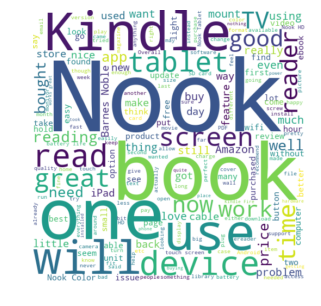

In [9]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

input_string = ' '.join(data['reviewText'])

wordcloud = WordCloud(width=500, height=500, margin=0, background_color="white").generate(input_string)

plt.rcParams['figure.figsize'] = [20, 5]
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

In [10]:
stop=stopwords.words('english')
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [11]:
lemm=WordNetLemmatizer()

In [12]:
def clean_text(sent):
    tokens = word_tokenize(sent)
    stop_updated=stop+["...","..","."] + ['nook','the','will','one','want','say','see','go','going','put','got','lot','many','able','aaa','aac',"n't",'use','kindle']
    stemmed = [lemm.lemmatize(term,pos='v') for term in tokens\
              if term.lower() not in stop_updated and \
              term.lower() not in list(punctuation) and \
              len(term) >2]
    res = " ".join(stemmed)
    return res

In [13]:
data['clean_text']=data.reviewText.apply(clean_text)

In [14]:
z=[]
for i in data['clean_text']:
    if len(re.findall(('((https?):((//)|(\\\\))+([\w\d:#@%/;$()~_?\+-=\\\.&](#!)?)*)'),i))>0:
        z.append(i.replace(re.findall(('((https?):((//)|(\\\\))+([\w\d:#@%/;$()~_?\+-=\\\.&](#!)?)*)'),i)[0][0],''))
    else:
        z.append(i)
data['clean_text']=z
data.head(1)

,Unnamed: 0,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,sentiment,clean_text
0,0,0528881469,"[0, 0]",5.0,We got this GPS for my husband who is an (OTR)...,"06 2, 2013",AO94DHGC771SJ,amazdnu,Gotta have GPS!,1.370131e+09,1,GPS husband OTR road trucker Impressed ship ti...


In [15]:
d=[]
for i in data['clean_text']:
    d.append(re.sub(r'\d+', '',i))
data['clean_text']=d

In [16]:
#from textblob import TextBlob
#data['clean_text'].apply(lambda x: str(TextBlob(x).correct()))

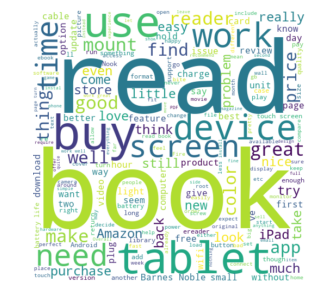

In [17]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

input_string = ' '.join(data['clean_text'])

wordcloud = WordCloud(width=500, height=500, margin=0, background_color="white").generate(input_string)

plt.rcParams['figure.figsize'] = [20, 5]
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

In [18]:
data.head()

,Unnamed: 0,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,sentiment,clean_text
0,0,0528881469,"[0, 0]",5.0,We got this GPS for my husband who is an (OTR)...,"06 2, 2013",AO94DHGC771SJ,amazdnu,Gotta have GPS!,1.370131e+09,1,GPS husband OTR road trucker Impressed ship ti...
1,1,0528881469,"[12, 15]",1.0,"I'm a professional OTR truck driver, and I bou...","11 25, 2010",AMO214LNFCEI4,Amazon Customer,Very Disappointed,1.290643e+09,0,professional OTR truck driver buy TND truck s...
2,2,0528881469,"[43, 45]",3.0,"Well, what can I say. I've had this unit in m...","09 9, 2010",A3N7T0DY83Y4IG,C. A. Freeman,1st impression,1.283990e+09,1,Well 've unit truck four days Prior Garmin T n...
3,3,0528881469,"[9, 10]",2.0,"Not going to write a long review, even thought...","11 24, 2010",A1H8PY3QHMQQA0,"Dave M. Shaw ""mack dave""","Great grafics, POOR GPS",1.290557e+09,0,write long review even think unit deserve 've ...
4,4,0528881469,"[0, 0]",1.0,I've had mine for a year and here's what we go...,"09 29, 2011",A24EV6RXELQZ63,Wayne Smith,"Major issues, only excuses for support",1.317254e+09,0,'ve mine year try route non truck rout tell tr...


In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [21]:
tfidf_vect=TfidfVectorizer(ngram_range=(2,2))

In [22]:
X=tfidf_vect.fit_transform(data['clean_text'])
X.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [23]:
tfidf=pd.DataFrame(X.toarray(),columns=tfidf_vect.get_feature_names())
tfidf.head()

,aapparenty company,abandon normal,abilities aware,abilities full,abilities screen,abilities strip,ability add,ability borrow,ability box,ability buy,...,zoom pinch,zoom rotate,zoom scroll,zoom text,zoom touch,zoom type,zoom update,zs photos,zune place,zune ve
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


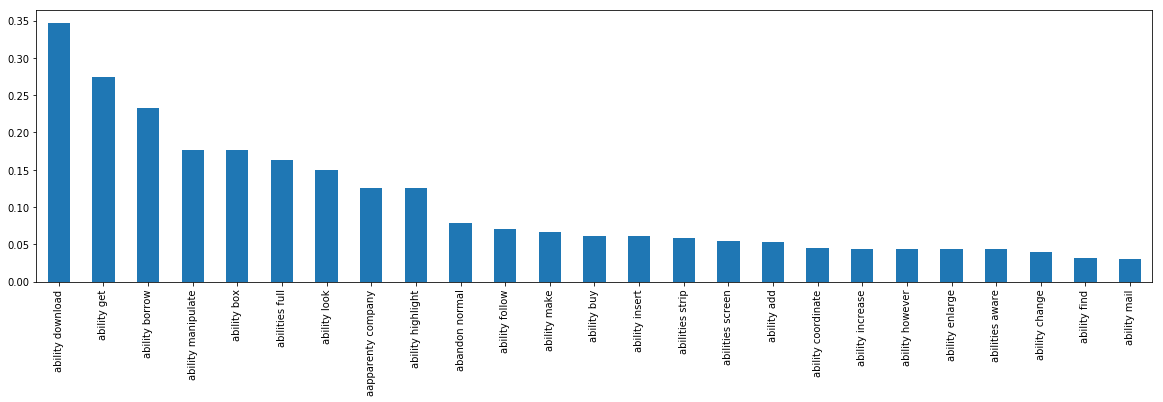

In [27]:
tfidf.sum().head(25).sort_values(ascending=False).plot(kind='bar')

In [76]:
# Bigram in the negative words
ls=['poor', 'waste', 'bad', 'defective', 'disgusting', 'untrusty', 'worst', 'horrible', 'unexpectedly', 'slow']

In [93]:
lst=[]
for j in tfidf.columns:
    for k in ls:
        if k in j.split():
            lst.append(j)
(lst)

['absolute waste',
 'access bad',
 'allow poor',
 'android bad',
 'angry waste',
 'apps poor',
 'backup bad',
 'bad all',
 'bad anything',
 'bad book',
 'bad boys',
 'bad burn',
 'bad buy',
 'bad cable',
 'bad call',
 'bad came',
 'bad cell',
 'bad change',
 'bad could',
 'bad create',
 'bad deal',
 'bad design',
 'bad device',
 'bad display',
 'bad egg',
 'bad enough',
 'bad everyone',
 'bad everything',
 'bad experience',
 'bad first',
 'bad further',
 'bad gadget',
 'bad glad',
 'bad good',
 'bad habit',
 'bad in',
 'bad ish',
 'bad landscape',
 'bad look',
 'bad minor',
 'bad navigation',
 'bad news',
 'bad nook',
 'bad obviously',
 'bad open',
 'bad opinion',
 'bad pay',
 'bad place',
 'bad planning',
 'bad problem',
 'bad protective',
 'bad pun',
 'bad reader',
 'bad really',
 'bad receive',
 'bad review',
 'bad software',
 'bad tablet',
 'bad taste',
 'bad thing',
 'bad things',
 'bad three',
 'bad unit',
 'bad unplug',
 'bad use',
 'bad wall',
 'bad would',
 'battery bad',
 'be

In [101]:
negative=tfidf[tfidf.columns[tfidf.columns.isin(lst)]]

In [27]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=5,random_state=0)
y_kmeans=kmeans.fit_predict(X)

In [28]:
data['cluster']=y_kmeans

In [57]:
Bow=tfidf.columns
num_clusters=5

In [61]:
ls=[]
print('Top term per cluster:')
order_centroids_arg=kmeans.cluster_centers_.argsort()[:,::-1]
for i in  range(num_clusters):
    print('Cluster:',i)
    for ind in order_centroids_arg[i,:10]:
        print(Bow[ind])
        ls.append(Bow[ind])

Top term per cluster:
Cluster: 0
barnes noble
work well
wall mount
work fine
battery life
touch screen
hdmi cable
cable work
read book
would recommend
Cluster: 1
great price
great buy
perfectly great
love love
hdmi cable
buy great
cable great
plug cable
product great
care spare
Cluster: 2
volume button
great love
happy purchase
money well
work great
spent love
clear volume
little speaker
button work
speaker microphone
Cluster: 3
easy install
move around
like fact
wall mount
install come
install work
work great
mount easy
lcd easy
well easy
Cluster: 4
work great
mount work
easy mount
great deal
need small
great need
mount wall
barnes noble
wall stud
still work


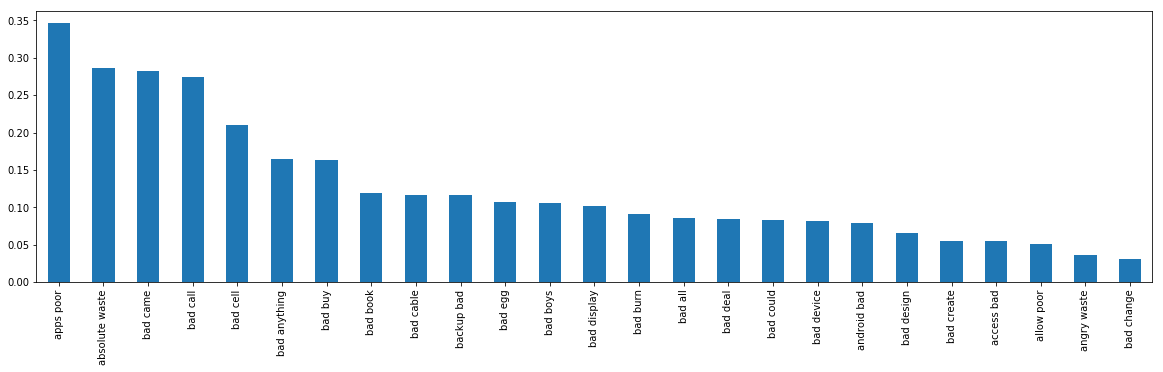

In [108]:
negative.sum().head(25).sort_values(ascending=False).plot(kind='bar')

In [104]:
negative

,absolute waste,access bad,allow poor,android bad,angry waste,apps poor,backup bad,bad all,bad anything,bad book,...,waste space,waste stupid,waste time,waste trip,work bad,worst happen,worst option,worst worlds,worthless slow,would waste
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0
